In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# DATA FILES SOURCE

In [3]:
vehicules= pd.read_csv('/home/fitec/PROJET/out_clean/vehicules.csv',dtype=str)
usagers=pd.read_csv('/home/fitec/PROJET/out_clean/usagers.csv',dtype=str)
charac=pd.read_csv('/home/fitec/PROJET/out_clean/caracteristiques.csv',dtype=str)
lieux=pd.read_csv('/home/fitec/PROJET/out_clean/lieux.csv',dtype=str)

In [4]:
vehicules.info()
#vehicules['catv']=vehicules['catv'].astype('category')
vehicules['catv']=vehicules['catv'].astype('int64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635811 entries, 0 to 1635810
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   Num_Acc  1635811 non-null  object
 1   catv     1635811 non-null  object
 2   num_veh  1635811 non-null  object
 3   year     1635811 non-null  object
dtypes: object(4)
memory usage: 49.9+ MB


In [5]:
usagers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142195 entries, 0 to 2142194
Data columns (total 12 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   Num_Acc  object
 1   place    object
 2   catu     object
 3   grav     object
 4   sexe     object
 5   trajet   object
 6   secu     object
 7   an_nais  object
 8   num_veh  object
 9   year     object
 10  dc       object
 11  age      object
dtypes: object(12)
memory usage: 196.1+ MB


In [6]:
usagers[['place','catu','grav','sexe','trajet','secu']]=usagers[['place','catu','grav','sexe','trajet','secu']].astype('int64')

usagers['age']=usagers['age'].astype('float64')

In [375]:
lieux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958469 entries, 0 to 958468
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Num_Acc  958469 non-null  object
 1   catr     958469 non-null  object
 2   circ     958469 non-null  object
 3   surf     958469 non-null  object
 4   situ     958469 non-null  object
 5   year     958469 non-null  object
dtypes: object(6)
memory usage: 43.9+ MB


In [7]:
lieux[['catr','circ','surf','situ']]=lieux[['catr','circ','surf','situ']].astype('int64')


In [377]:
charac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958469 entries, 0 to 958468
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Num_Acc  958469 non-null  object
 1   an       958469 non-null  object
 2   mois     958469 non-null  object
 3   jour     958469 non-null  object
 4   hrmn     958469 non-null  object
 5   lum      958469 non-null  object
 6   agg      958469 non-null  object
 7   atm      958469 non-null  object
 8   com      958467 non-null  object
 9   adr      816550 non-null  object
 10  gps      480052 non-null  object
 11  lat      471401 non-null  object
 12  long     468188 non-null  object
 13  dep      958469 non-null  object
 14  year     958469 non-null  object
 15  cp       958467 non-null  object
 16  h24      958469 non-null  object
dtypes: object(17)
memory usage: 124.3+ MB


In [8]:
charac[['lum','agg','atm']]=charac[['lum','agg','atm']].astype('int64')

# MISE EN COMMUN DES DONNEES

In [9]:
df_once=charac.merge(lieux,on=['Num_Acc','year']).drop(['adr'],axis=1)
df_dbl=usagers.merge(vehicules,on=['Num_Acc','num_veh','year'])

In [10]:
df_rdc=df_once.merge(df_dbl,on=['Num_Acc','year'])

In [1001]:
df_rdc.shape

(2142173, 31)

In [1002]:
print(df_rdc.head())

        Num_Acc   an  mois jour  hrmn  lum  agg  atm  com gps  ...  catu  \
0  200500000001  5.0   1.0   12  1900    3    2    1  011   M  ...     1   
1  200500000001  5.0   1.0   12  1900    3    2    1  011   M  ...     1   
2  200500000001  5.0   1.0   12  1900    3    2    1  011   M  ...     2   
3  200500000001  5.0   1.0   12  1900    3    2    1  011   M  ...     2   
4  200500000001  5.0   1.0   12  1900    3    2    1  011   M  ...     2   

   grav sexe  trajet  secu  an_nais  num_veh  dc   age  catv  
0     4    1       1    11   1976.0      A01   0  44.0     7  
1     3    2       3    11   1968.0      B02   0  52.0     7  
2     1    1       0    11   1964.0      B02   0  56.0     7  
3     1    1       0    31   2004.0      B02   0  16.0     7  
4     1    1       0    11   1998.0      B02   0  22.0     7  

[5 rows x 31 columns]


In [11]:
df_rdc[['an','mois','h24','cp','lat','long','year']]=df_rdc[['an','mois','h24','cp','lat','long','year']].astype('float64')


In [12]:
df_rdc['lat']=df_rdc.loc[:,'lat']/100000

In [13]:
df_rdc['long']=df_rdc.loc[:,'long']/100000

In [297]:
vehicules.head()

,Num_Acc,catv,num_veh,year
0,200500000001,7,A01,2005
1,200500000001,7,B02,2005
2,200500000002,7,A01,2005
3,200500000002,2,B02,2005
4,200500000003,2,A01,2005


In [941]:
df_rdc.isna().sum()*100/len(df_rdc)

Num_Acc     0.000000
an          0.000000
mois        0.000000
jour        0.000000
hrmn        0.000000
lum         0.000000
agg         0.000000
atm         0.000000
com         0.000280
gps        48.808850
lat        49.756626
long       50.094740
dep         0.000000
year        0.000000
cp          0.000280
h24         0.000000
catr        0.000000
circ        0.000000
surf        0.000000
situ        0.000000
place       0.000000
catu        0.000000
grav        0.000000
sexe        0.000000
trajet      0.000000
secu        0.000000
an_nais     0.000000
num_veh     0.000000
dc          0.000000
age         0.000000
catv        0.000000
dtype: float64

In [15]:
df_rdc.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,atm,com,gps,...,catu,grav,sexe,trajet,secu,an_nais,num_veh,dc,age,catv
0,200500000001,5.0,1.0,12,1900,3,2,1,011,M,...,1,4,1,1,11,1976.0,A01,0,44.0,07
1,200500000001,5.0,1.0,12,1900,3,2,1,011,M,...,1,3,2,3,11,1968.0,B02,0,52.0,07
2,200500000001,5.0,1.0,12,1900,3,2,1,011,M,...,2,1,1,0,11,1964.0,B02,0,56.0,07
3,200500000001,5.0,1.0,12,1900,3,2,1,011,M,...,2,1,1,0,31,2004.0,B02,0,16.0,07
4,200500000001,5.0,1.0,12,1900,3,2,1,011,M,...,2,1,1,0,11,1998.0,B02,0,22.0,07


# EXPLORATION

In [1]:
## analyses bivariées

In [ ]:
pd.crosstab(usagers["dc"],charac["lum"],margins=True)

In [ ]:
pd.crosstab(usagers["dc"],charac["agg"],margins=True)

In [ ]:
pd.crosstab(usagers["dc"],charac["atm"],margins=True)

In [ ]:
pd.crosstab(usagers["dc"],lieux["catr"],margins=True)

In [ ]:
pd.crosstab(usagers["dc"],lieux["circ"],margins=True)

In [ ]:
pd.crosstab(usagers["dc"],lieux["surf"],margins=True)

In [ ]:
pd.crosstab(usagers["dc"],lieux["situ"],margins=True)

In [66]:
pd.crosstab(usagers["dc"],vehicules["catv"],margins=True)

catv,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,99,All
dc,,,,,,,,,,,,,,,,,,,,,
0,66113,85230,5630,7280,21197,37,988893,119,295,79445,...,111578,16579,428,1870,10162,2828,371,1759,6389,1590867
1,1816,2401,149,183,619,2,27928,1,5,2295,...,3103,470,9,42,319,82,11,67,172,44944
All,67929,87631,5779,7463,21816,39,1016821,120,300,81740,...,114681,17049,437,1912,10481,2910,382,1826,6561,1635811


In [ ]:
pd.crosstab(usagers["dc"],usagers["place"],margins=True)

In [ ]:
pd.crosstab(usagers["dc"],usagers["catu"],margins=True)

In [997]:
pd.crosstab(usagers["dc"],usagers["secu"],margins=True)

secu,0,1,2,3,10,11,12,13,20,21,...,33,40,41,42,43,90,91,92,93,All
dc,,,,,,,,,,,,,,,,,,,,,
0,65409,3304,2336,7414,5447,1229306,29976,163256,713,376512,...,812,2,2412,1646,1970,68,7483,7347,102850,2084614
1,2965,264,333,293,184,24698,6339,3657,41,12992,...,25,0,120,210,34,5,170,346,2271,57581
All,68374,3568,2669,7707,5631,1254004,36315,166913,754,389504,...,837,2,2532,1856,2004,73,7653,7693,105121,2142195


In [ ]:
pd.crosstab(usagers["dc"],usagers["sexe"],margins=True)

In [83]:
pd.crosstab(df_rdc["dc"],df_rdc["mois"],margins=True)

mois,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,All
dc,,,,,,,,,,,,,
0,158999,139244,162298,168792,180352,194274,187918,159074,189032,195863,178336,170411,2084593
1,4317,3792,4219,4469,4765,4937,5823,5201,5071,5332,4633,5021,57580
All,163316,143036,166517,173261,185117,199211,193741,164275,194103,201195,182969,175432,2142173


In [16]:
# MATRICES DE CORRELATION

In [17]:
print(df_rdc.corr())

            an      mois       lat      long      year        cp       h24  \
an    1.000000  0.002988  0.422194 -0.002287  1.000000  0.029570  0.012856   
mois  0.002988  1.000000 -0.019077 -0.005841  0.002988 -0.004415 -0.006528   
lat   0.422194 -0.019077  1.000000 -0.005109  0.422194 -0.020220  0.002815   
long -0.002287 -0.005841 -0.005109  1.000000 -0.002287  0.005857 -0.001480   
year  1.000000  0.002988  0.422194 -0.002287  1.000000  0.029570  0.012856   
cp    0.029570 -0.004415 -0.020220  0.005857  0.029570  1.000000  0.018156   
h24   0.012856 -0.006528  0.002815 -0.001480  0.012856  0.018156  1.000000   
age  -0.177368 -0.007922 -0.075844 -0.002095 -0.177368 -0.030021 -0.008289   

           age  
an   -0.177368  
mois -0.007922  
lat  -0.075844  
long -0.002095  
year -0.177368  
cp   -0.030021  
h24  -0.008289  
age   1.000000  


array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

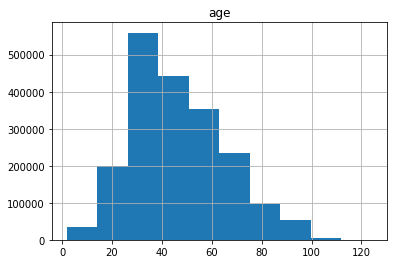

In [18]:
# HISTOGRAMME DES AGES
df_rdc.hist(column='age')

array([<AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>], dtype=object)

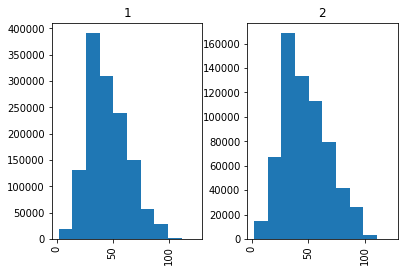

In [19]:
# HISTOGRAMME DE L'AGE SELON LE SEXE
df_rdc.hist(column='age',by='sexe')

<AxesSubplot:title={'center':'age'}, xlabel='sexe'>

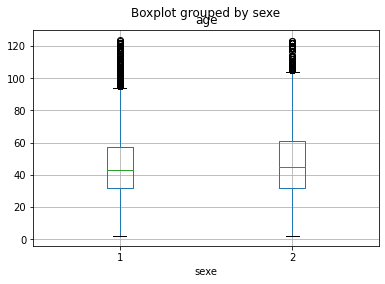

In [23]:
df_rdc.boxplot(column='age',by='sexe')

<AxesSubplot:xlabel='grav', ylabel='age'>

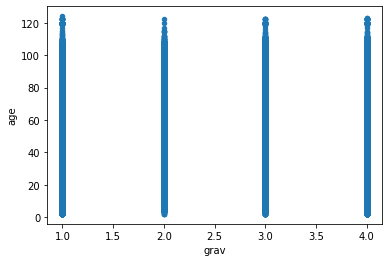

In [193]:
#scatterplot : age vs. grav
df_rdc.plot.scatter(x='grav',y='age')

Text(0, 0.5, 'Accident count')

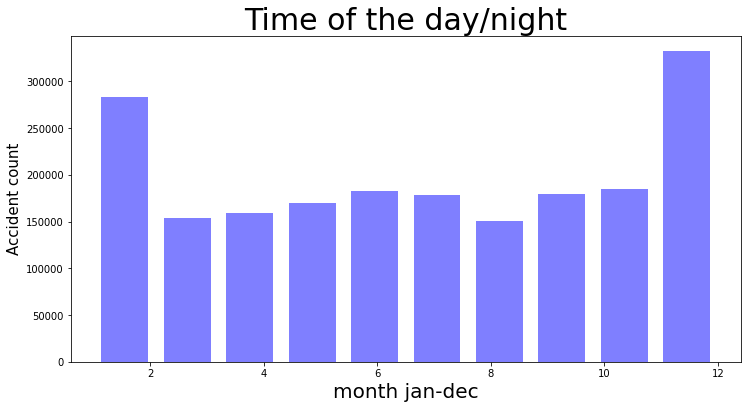

In [18]:
# HISTOGRAMME du mois de l acc
plt.figure(figsize=(12,6))
df_rdc.mois.hist(rwidth=0.75,alpha =0.50, color= 'blue')
plt.title('fréquence d'accident par mois,fontsize= 30)
plt.grid(False)
plt.xlabel('month jan-dec' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

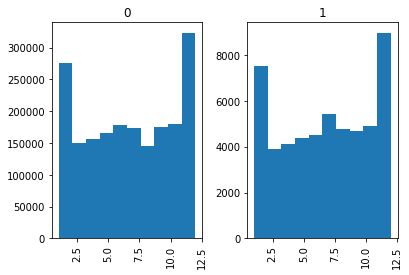

In [198]:
# HISTOGRAMME DE L'l heure de l acc
df_rdc.hist(column='mois', by='dc')

Text(0, 0.5, 'Accident count')

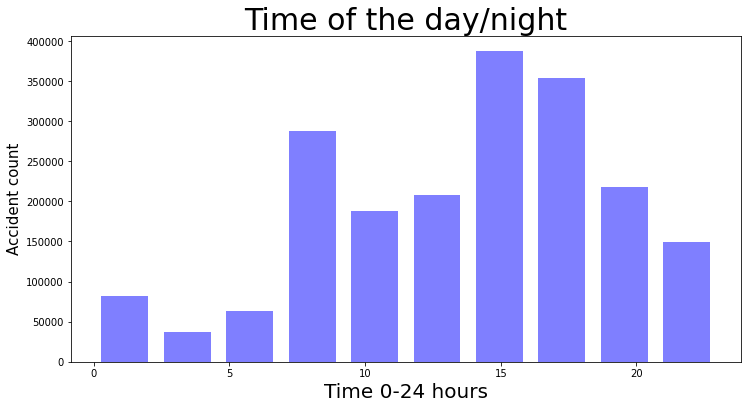

In [19]:
plt.figure(figsize=(12,6))
df_rdc.h24.hist(rwidth=0.75,alpha =0.50, color= 'blue')
plt.title('Time of the day/night',fontsize= 30)
plt.grid(False)
plt.xlabel('Time 0-24 hours' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)

In [205]:
df_rdc.h24.mean()

27.675639268805625

In [49]:
df_rdc['dc'].value_counts()

0    1923032
1      53132
Name: dc, dtype: int64

In [27]:
plt.rc("font", size=14)


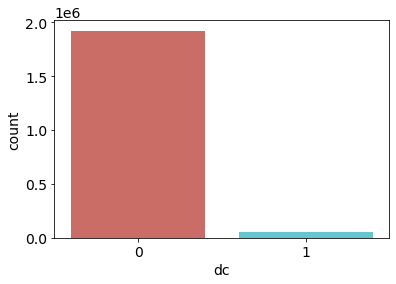

In [28]:
sns.countplot(x='dc',data=df_rdc,palette='hls')
plt.show()

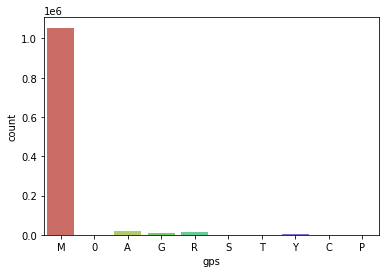

In [64]:
sns.countplot(x='gps',data=df_rdc,palette='hls')
plt.show()

In [50]:
df_rdc.groupby('sexe').mean()

,an,mois,lum,agg,atm,lat,long,year,cp,h24,...,surf,situ,place,catu,grav,trajet,secu,dc,age,catv
sexe,,,,,,,,,,,,,,,,,,,,,
1,11.116906,6.680718,1.950964,1.652693,1.544530,3.445239e+06,9.634889e+06,2011.116906,59721.998037,27.84813,...,1.237410,1.160163,1.209532,1.245545,2.418645,3.245395,17.686453,0.030482,45.804692,12.211474
2,11.018265,6.686018,1.780250,1.663321,1.591019,3.509441e+06,1.844315e+06,2011.018265,58049.581957,27.32122,...,1.263171,1.144257,1.434244,1.541843,2.705774,2.865687,17.310462,0.019498,47.727152,9.257169


In [30]:
pd.crosstab(df_rdc["dc"],df_rdc["trajet"],margins=True)

trajet,0,1,2,3,4,5,9,All
dc,,,,,,,,
0,552500,251243,40325,48143,191621,704230,134594,1922656
1,12062,5822,608,2031,1988,26504,4102,53117
All,564562,257065,40933,50174,193609,730734,138696,1975773


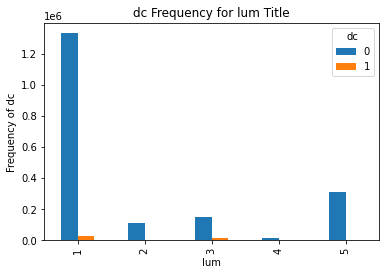

In [31]:
plt.figure(figsize=(10,10))
%matplotlib inline
pd.crosstab(df_rdc.lum,df_rdc.dc).plot(kind='bar')
plt.title('dc Frequency for lum Title')
plt.xlabel('lum')
plt.ylabel('Frequency of dc')
#plt.savefig('purchase_fre_job')
plt.show()

Text(0, 0.5, 'Frequency of dc')

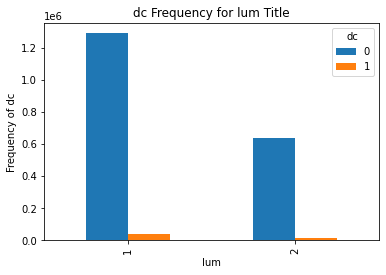

In [32]:
%matplotlib inline
pd.crosstab(df_rdc.sexe,df_rdc.dc).plot(kind='bar')
plt.title('dc Frequency for lum Title')
plt.xlabel('lum')
plt.ylabel('Frequency of dc')

Text(0, 0.5, 'Frequency of dc')

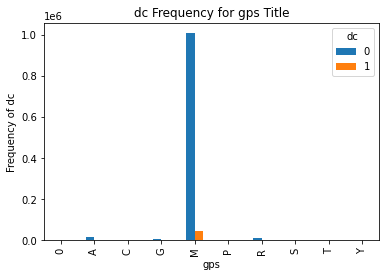

In [65]:
%matplotlib inline
pd.crosstab(df_rdc.gps,df_rdc.dc).plot(kind='bar')
plt.title('dc Frequency for gps Title')
plt.xlabel('gps')
plt.ylabel('Frequency of dc')

Text(0, 0.5, 'Frequency of dc')

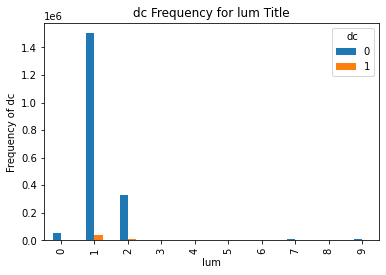

In [33]:
plt.figure(figsize=(10,10))
%matplotlib inline
pd.crosstab(df_rdc.surf,df_rdc.dc).plot(kind='bar')
plt.title('dc Frequency for lum Title')
plt.xlabel('lum')
plt.ylabel('Frequency of dc')


In [ ]:
#### plt.scatter(df_rdc.Long,df_rdc.Lat,c = df_rdc.dc)

#  Test sur la moyenne

In [ ]:
# TEST DE STUDENT POUR LES EXPLICATIVES QUANTI

In [223]:
from scipy import stats


In [248]:
stats.ttest_ind(df_rdc.loc[df_rdc.dc=='1','age'],df_rdc.loc[df_rdc.dc=='0','age'])

Ttest_indResult(statistic=73.37265797898313, pvalue=0.0)

In [249]:
stats.ttest_ind(df_rdc.loc[df_rdc.dc=='1','cp'],df_rdc.loc[df_rdc.dc=='0','cp'])


Ttest_indResult(statistic=-50.64620394236335, pvalue=0.0)

In [250]:
stats.ttest_ind(df_rdc.loc[df_rdc.dc=='1','h24'],df_rdc.loc[df_rdc.dc=='0','h24']) #, equal_var=False)

Ttest_indResult(statistic=-34.965401675188794, pvalue=9.129432629626245e-268)

# ==============    dichotomisation variables catégorielle  ============


In [36]:
#  EXPLICATIVES QUALITATIVES
x_quali=df_rdc[['catv','trajet','secu','catr','lum']]

In [37]:
#  one hot encoding
x_dicho = pd.get_dummies(x_quali.astype(str))

In [38]:
data=x_dicho

In [39]:
data[['dc','age','h24','year','agg']]=df_rdc[['dc','age','h24','year','agg']]

In [40]:
data.info()

In [41]:
data.dc.value_counts()

In [42]:
#data.dc.value_counts(normalize=True)

In [43]:
# EXPLICATIVES --feaures
x_var= data.loc[:, data.columns != 'dc']


In [44]:
# endogène --> labels
y=data.dc

In [951]:
#x_var.info()

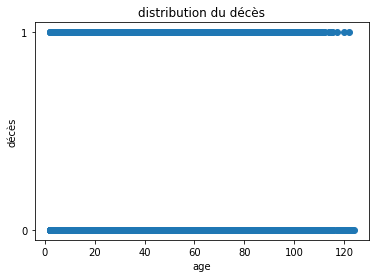

In [1000]:
# VISUALISE on Y/X
plt.scatter(df_rdc.age,data.dc)

plt.title('distribution du décès' )
plt.xlabel('age')
plt.ylabel('décès')
plt.show()

# prediction en mode  echantillon apprentissage - test

In [45]:
# TRAINING & TEST DATA 
X_train, X_test, y_train, y_test = train_test_split(x_var, y, test_size=0.3, random_state=1,stratify=data.dc)
df_train, df_test= train_test_split(data, test_size=0.3, random_state=1,stratify=data.dc)

In [242]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383314 entries, 489441 to 445125
Columns: 118 entries, catv_1 to agg
dtypes: float64(4), int64(2), object(1), uint8(111)
memory usage: 230.9+ MB


In [863]:
X_train.shape

(1499521, 81)

In [955]:
X_test.shape

(642652, 81)

# =======================  SKlearn ==============================

In [73]:
from sklearn import preprocessing
from sklearn.metrics import classification_report

#instanciation
lr = LogisticRegression(penalty='none',solver='newton-cg')
#X_train=X_train.head(100)

#y_train=y_train.head(100)



#normalisation
stds = preprocessing.StandardScaler()
#transformation
X_Train = stds.fit_transform(X_train)
X_test= stds.fit_transform(X_test)

In [47]:
lr.fit(X_Train,y_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [958]:
X_train.shape

(1499521, 81)

In [959]:
#affichage des coefficients
#print(pd.DataFrame({"var":X_train.columns,"coef":lr.coef_[0]}))

In [26]:
# PREDICTION Y
y_pred = lr.predict(X_test)

In [961]:
# PERFORMANCES

In [32]:
#taux de reconnaissance --> 575257+953/total
print(metrics.accuracy_score(y_test,y_pred))

0.9728857919994025


In [35]:
#Sensibilité 
print(metrics.recall_score(y_test,y_pred,pos_label='0'))

0.9991541115933084


In [34]:
#taux d'erreur --> 14987+1653/total
print(1.0 - metrics.accuracy_score(y_test,y_pred))

0.027114208000597495


In [965]:
#précision – 93/(8+93)
print(metrics.precision_score(y_test,y_pred,pos_label='1'))

0.4860335195530726


In [48]:
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['observé'], colnames=['Prédit'], margins=True)

Accuracy 97.31
              precision    recall  f1-score   support

           0   0.973505  0.999559  0.986360    625378
           1   0.486034  0.015109  0.029308     17274

    accuracy                       0.973097    642652
   macro avg   0.729769  0.507334  0.507834    642652
weighted avg   0.960402  0.973097  0.960635    642652



Prédit,0,1,All
observé,,,
0,625102,276,625378
1,17013,261,17274
All,642115,537,642652


In [81]:
#  Optimisation par Méthode --> Hyperparameter tuning)
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv=3, random_state=0, max_iter=100)
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Observé'], colnames=['Prédit'], margins=True)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy 58.39
              precision    recall  f1-score   support

           0   0.993719  0.576061  0.729329    625378
           1   0.053538  0.868183  0.100856     17274

    accuracy                       0.583913    642652
   macro avg   0.523629  0.722122  0.415093    642652
weighted avg   0.968448  0.583913  0.712436    642652



Prédit,0,1,All
Observé,,,
0,360256,265122,625378
1,2277,14997,17274
All,362533,280119,642652


In [82]:
#Sensibilité 
print(metrics.recall_score(y_test,y_pred,pos_label='1'))

0.8681833970128516


#  =================Arbre Decision ============================

In [60]:
from sklearn.tree import DecisionTreeClassifier
arbreFirst=DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10) #,max_leaf_nodes=20

In [61]:
# Construction de l'arbre

arbreFirst.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=30)

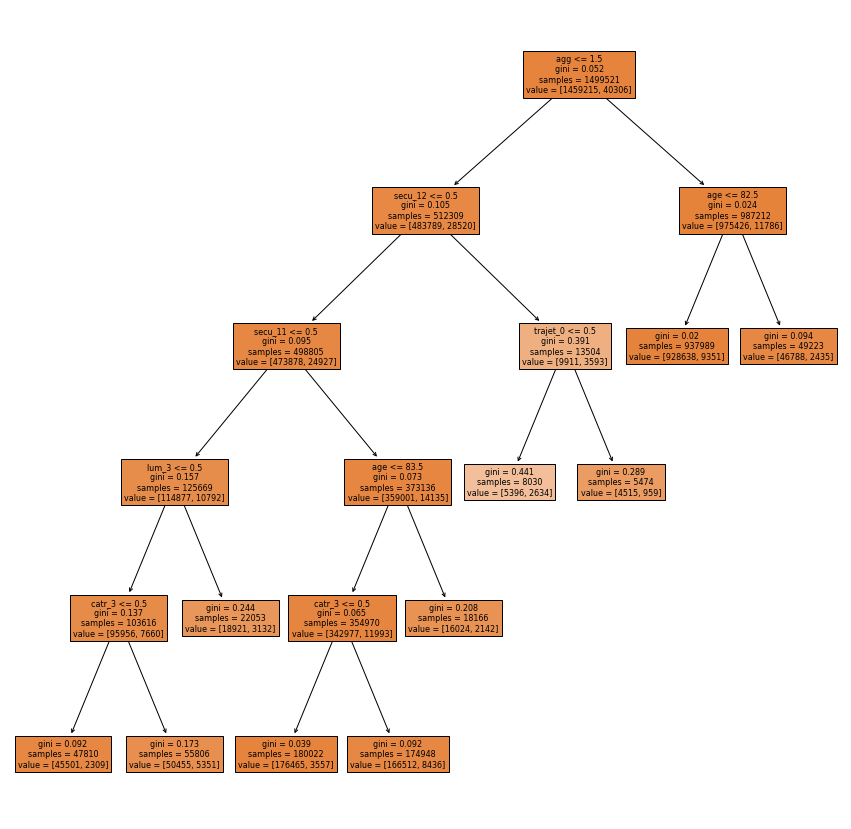

In [51]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(arbreFirst,feature_names=list(x_var.columns ),filled=True)
plt.show()

In [62]:
#importance des variables
impVarFirst={"Variable":x_var.columns,"Importance":arbreFirst.feature_importances_}
print(pd.DataFrame(impVarFirst).sort_values(by="Importance",ascending=False))

   Variable  Importance
77      age    0.252051
78      h24    0.145984
79     year    0.137332
44  secu_12    0.086612
80      agg    0.085198
..      ...         ...
10  catv_19    0.000000
60  secu_90    0.000000
30   catv_8    0.000000
56  secu_40    0.000000
28   catv_6    0.000000

[81 rows x 2 columns]


In [63]:
#prédiction sur l'échantillon test
pred = arbreFirst.predict(X_test)

#distribution des predictions

print(np.unique(pred,return_counts=True))

(array(['0', '1'], dtype=object), array([631172,  11480]))


In [64]:
# MATRICE DE CONFUSION 
print(metrics.confusion_matrix(y_test,pred))

[[615217  10161]
 [ 15955   1319]]


# Indicateur de performance

In [68]:
#taux de reconnaissance --> 575257+953/total
print(metrics.accuracy_score(y_test,pred))

0.9593621431194488


In [ ]:
# comparaison de l'accuracy entre train & test

In [69]:
# Prediction sur l'echantillon train
pred2 = arbreFirst.predict(X_train)

In [70]:
print(metrics.accuracy_score(y_train,pred2))

0.9737416148223332


In [71]:
# matrice de confusion sur l'echantillon train
print(metrics.confusion_matrix(y_train,pred2))

[[1457949    1266]
 [  38109    2197]]


In [976]:
y_train.shape

(1499521,)

In [979]:
#taux d'erreur --> 14987+1653/total
print(1.0 - metrics.accuracy_score(y_test,pred))

0.040637856880551215


In [67]:
#rappel – sensibilité 953/14987+953
print(metrics.recall_score(y_test,pred,pos_label='0'))

0.9837522266533201


In [981]:
#précision – 93/(8+93)
print(metrics.precision_score(y_test,pred,pos_label='1'))

0.11489547038327526
